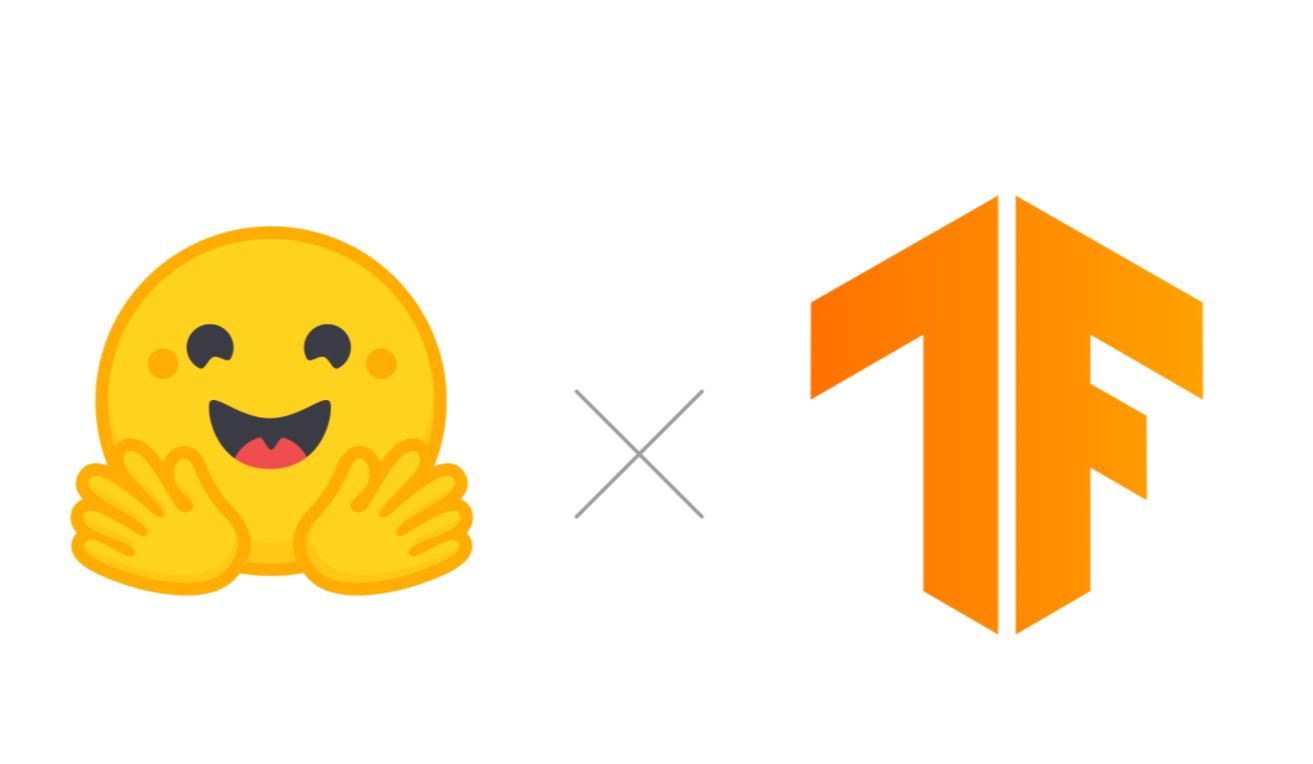

In [1]:
from IPython.display import Image
Image("../input/huggingface-image/Capture.JPG")

# Problem Introduction
StumbleUpon is a user-curated web content discovery engine that recommends relevant, high quality pages and media to its users, based on their interests. While some pages we recommend, such as news articles or seasonal recipes, are only relevant for a short period of time, others maintain a timeless quality and can be recommended to users long after they are discovered. In other words, pages can either be classified as "ephemeral" or "evergreen". The ratings we get from our community give us strong signals that a page may no longer be relevant - but what if we could make this distinction ahead of time? A high quality prediction of "ephemeral" or "evergreen" would greatly improve a recommendation system like ours.

Many people know evergreen content when they see it, but can an algorithm make the same determination without human intuition? Your mission is to build a classifier which will evaluate a large set of URLs and label them as either evergreen or ephemeral. Can you out-class(ify) StumbleUpon? As an added incentive to the prize, a strong performance in this competition may lead to a career-launching internship at one of the best places to work in San Francisco.

# Data<br>

There are two components to the data provided for this challenge:

The first component is two files: train.tsv and test.tsv. Each is a tab-delimited text file containing the fields outlined below for 10,566 urls total. Fields for which no data is available are indicated with a question mark.

train.tsv  is the training set and contains 7,395 urls. Binary evergreen labels (either evergreen (1) or non-evergreen (0)) are provided for this set.
test.tsv is the test/evaluation set and contains 3,171 urls.

# Approach 

My aim of taking this past competition is to try out the effect of the new advances in NLP technology over this dataset. <br> This can allow me to gain experience to in that technology . I am planing to tackle this problem using Transformer architecture (BERT) from Hugging face library and TensorFlow 2.0 . Combining this two would allow me to build a powerful state of the art model for the classification task. 

# Pre-processing 

I am just going to focus on the NLP part of the data and see if I can beat the 7 year old competition winner ( or atleast come close) . So i am going to neglect the rest of the feature columns. Also with respect to pre-processing I have done minimum pre-processing ( lower-casing and removing the title and url words )from the text as I expect the Hugging face tokenizer to take care of the rest. Also this article being some kind of news feed it wont contain as many slangs and non-proper english phrases. 

# Model 

Pre-traine BERT model from Hugging Face Library 
Take out embedding from the BERT model 
Feed the embedding into a feed forward Neural network model. 
Evaluate on ROC-AUC curve. 

In [2]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

import tensorflow as tf 

# Load the data 

In [3]:
df_train=pd.read_csv('/kaggle/input/stumbleupon/train.tsv',sep='\t')

df_test=pd.read_csv('/kaggle/input/stumbleupon/test.tsv',sep='\t',usecols=['urlid','boilerplate'])


# Data Explorations 

The dataset containes 27 columns and the end goal is predicting if the article is evergreen or non-evergreen. <br>


In [4]:
df_train.head()


,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,...,1,1,24,0,5424,170,8,0.152941,0.079130,0
1,http://www.popsci.com/technology/article/2012-...,8471,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,...,1,1,40,0,4973,187,9,0.181818,0.125448,1
2,http://www.menshealth.com/health/flu-fighting-...,1164,"{""title"":""Fruits that Fight the Flu fruits tha...",health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,...,1,1,55,0,2240,258,11,0.166667,0.057613,1
3,http://www.dumblittleman.com/2007/12/10-foolpr...,6684,"{""title"":""10 Foolproof Tips for Better Sleep ""...",health,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,...,1,0,24,0,2737,120,5,0.041667,0.100858,1
4,http://bleacherreport.com/articles/1205138-the...,9006,"{""title"":""The 50 Coolest Jerseys You Didn t Kn...",sports,0.719157,2.676471,0.500000,0.222222,0.123457,0.043210,...,1,1,14,0,12032,162,10,0.098765,0.082569,0


In [5]:
df_train.columns

Index(['url', 'urlid', 'boilerplate', 'alchemy_category',
       'alchemy_category_score', 'avglinksize', 'commonlinkratio_1',
       'commonlinkratio_2', 'commonlinkratio_3', 'commonlinkratio_4',
       'compression_ratio', 'embed_ratio', 'framebased', 'frameTagRatio',
       'hasDomainLink', 'html_ratio', 'image_ratio', 'is_news',
       'lengthyLinkDomain', 'linkwordscore', 'news_front_page',
       'non_markup_alphanum_characters', 'numberOfLinks', 'numwords_in_url',
       'parametrizedLinkRatio', 'spelling_errors_ratio', 'label'],
      dtype='object')

In [6]:
df_train['alchemy_category'].value_counts()

?                     2342
recreation            1229
arts_entertainment     941
business               880
health                 506
sports                 380
culture_politics       343
computer_internet      296
science_technology     289
gaming                  76
religion                72
law_crime               31
unknown                  6
weather                  4
Name: alchemy_category, dtype: int64

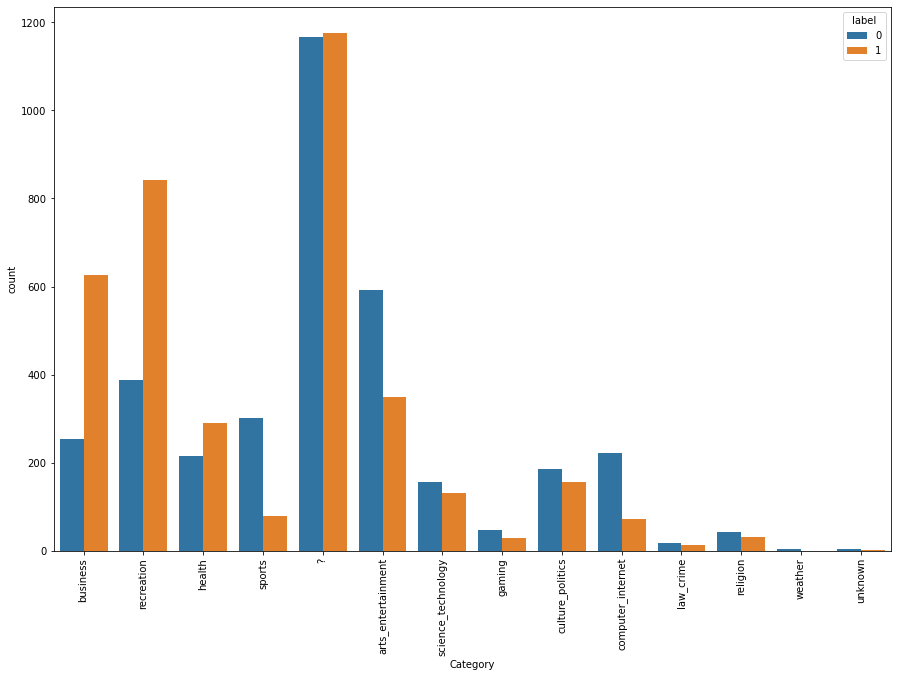

In [7]:
plt.figure(figsize=(15,10))
sns.countplot(x=df_train['alchemy_category'],hue=df_train['label']);
plt.xlabel('Category');
plt.xticks(rotation=90);

Alchemy catergory does have a role in determining the label for the article 

We see that business, Recreation and health are more likley to be evergreen <br>

Where as sports computer_internet and arts and entertainment are more like to be non-evergreen. <br>

<AxesSubplot:xlabel='label', ylabel='count'>

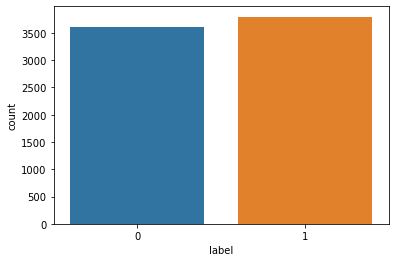

In [8]:
sns.countplot(x=df_train['label'])
# This is a balanced dataset 

## Cleaning the boilerplate text

Lets remove the title and url word from each description . We will also lower case the words as we are planing to used a uncased version of Transformer model

In [9]:
df_train['boilerplate'].replace(to_replace=r'"title":', value="",inplace=True,regex=True)
df_train['boilerplate'].replace(to_replace=r'"url":',value="",inplace=True,regex=True)

df_train['boilerplate'].replace(to_replace=r'{|}',value="",inplace=True,regex=True)
df_train['boilerplate']=df_train['boilerplate'].str.lower()


#Cleaning the test dataframe 

df_test['boilerplate'].replace(to_replace=r'"title":', value="",inplace=True,regex=True)
df_test['boilerplate'].replace(to_replace=r'"url":',value="",inplace=True,regex=True)

df_test['boilerplate'].replace(to_replace=r'{|}',value="",inplace=True,regex=True)
df_test['boilerplate']=df_test['boilerplate'].str.lower()

# Model Download from Hugging Face 

In [10]:
from transformers import AutoTokenizer, TFAutoModel


#Downloading the tokenizer and the Albert model for fine tuning

tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
bert=TFAutoModel.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/433 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [11]:
#ADD all the variable for the Transformer model 

SEQ_length=512

#Lets create the X and Y matrix from the Df train set 

Xids=np.zeros((df_train.shape[0],SEQ_length))
Xmask=np.zeros((df_train.shape[0],SEQ_length))
y=np.zeros((df_train.shape[0],1))

#Preparing the test dataframe

Xids_test=np.zeros((df_test.shape[0],SEQ_length))
Xmask_test=np.zeros((df_test.shape[0],SEQ_length))


In [12]:
for i,sequence in enumerate(df_train['boilerplate']):
    tokens=tokenizer.encode_plus(sequence,max_length=SEQ_length,padding='max_length',add_special_tokens=True,
                           truncation=True,return_token_type_ids=False,return_attention_mask=True,
                           return_tensors='tf')
    
    Xids[i,:],Xmask[i,:],y[i,0]=tokens['input_ids'],tokens['attention_mask'],df_train.loc[i,'label']
    

for i,sequence in enumerate(df_test['boilerplate']):
    tokens=tokenizer.encode_plus(sequence,max_length=SEQ_length,padding='max_length',add_special_tokens=True,
                           truncation=True,return_token_type_ids=False,return_attention_mask=True,
                           return_tensors='tf')
    
    Xids_test[i,:],Xmask_test[i,:]=tokens['input_ids'],tokens['attention_mask']

In [13]:
#Check if the GPU is avalaible
tf.config.get_visible_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [14]:
dataset=tf.data.Dataset.from_tensor_slices((Xids,Xmask,y))

def map_func(input_ids,mask,labels):
    return {'input_ids':input_ids,'attention_mask':mask},labels

dataset=dataset.map(map_func)
dataset=dataset.shuffle(100000).batch(32).prefetch(1000)

DS_size=len(list(dataset))

train=dataset.take(round(DS_size*0.85))
val=dataset.skip(round(DS_size*0.85))

In [15]:
#Preparing the test dataset

dataset_test=tf.data.Dataset.from_tensor_slices((Xids_test,Xmask_test))

def map_func(input_ids,mask):
    return {'input_ids':input_ids,'attention_mask':mask}

dataset_test=dataset_test.map(map_func)
dataset_test=dataset_test.batch(32).prefetch(1000)

Decode the test data and see if urlid and text matches 

# Build the model 

In [16]:
input_ids=tf.keras.layers.Input(shape=(SEQ_length,),name='input_ids',dtype='int32')
input_mask=tf.keras.layers.Input(shape=(SEQ_length,),name='attention_mask',dtype='int32')

embedding=bert(input_ids,attention_mask=input_mask)[0]
#x=tf.keras.layers.GlobalMaxPool1D()(embedding)
x=tf.keras.layers.GlobalAveragePooling1D()(embedding)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.Dense(128,activation='relu')(x)
x=tf.keras.layers.Dropout(0.3)(x)
x=tf.keras.layers.Dense(64,activation='relu')(x)
output=tf.keras.layers.Dense(1,activation='sigmoid')(x)


model=tf.keras.Model(inputs=[input_ids,input_mask],outputs=output)

model.layers[2].trainable=False

In [17]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 512)]        0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 512)]        0                                            
__________________________________________________________________________________________________
tf_bert_model (TFBertModel)     TFBaseModelOutputWit 109482240   input_ids[0][0]                  
                                                                 attention_mask[0][0]             
__________________________________________________________________________________________________
global_average_pooling1d (Globa (None, 768)          0           tf_bert_model[0][0]          

In [18]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer='adam',metrics=[tf.keras.metrics.AUC()])

In [19]:
history=model.fit(train,validation_data=val,epochs=20)

Epoch 1/20
197/197 [==============================] - 189s 904ms/step - loss: 0.5414 - auc: 0.8055 - val_loss: 0.5265 - val_auc: 0.8802
Epoch 2/20
197/197 [==============================] - 175s 888ms/step - loss: 0.4349 - auc: 0.8815 - val_loss: 0.4376 - val_auc: 0.8787
Epoch 3/20
197/197 [==============================] - 175s 888ms/step - loss: 0.4559 - auc: 0.8707 - val_loss: 0.4000 - val_auc: 0.8981
Epoch 4/20
197/197 [==============================] - 175s 889ms/step - loss: 0.4301 - auc: 0.8829 - val_loss: 0.3686 - val_auc: 0.9152
Epoch 5/20
197/197 [==============================] - 175s 888ms/step - loss: 0.4215 - auc: 0.8870 - val_loss: 0.4029 - val_auc: 0.8955
Epoch 6/20
197/197 [==============================] - 175s 889ms/step - loss: 0.4346 - auc: 0.8805 - val_loss: 0.3700 - val_auc: 0.9182
Epoch 7/20
197/197 [==============================] - 175s 889ms/step - loss: 0.4080 - auc: 0.8949 - val_loss: 0.3787 - val_auc: 0.9116
Epoch 8/20
197/197 [============================

# Prediction 

In [20]:
predictions=model.predict(dataset_test)

In [21]:
df_test['label']=predictions

df_test.to_csv('submission_avgpool_dp.csv',columns=['urlid','label'],index=False)

# Useful Links 

https://towardsdatascience.com/working-with-hugging-face-transformers-and-tf-2-0-89bf35e3555a

http://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/

https://www.youtube.com/watch?v=GYDFBfx8Ts8&ab_channel=JamesBriggs

https://medium.com/tensorflow/using-tensorflow-2-for-state-of-the-art-natural-language-processing-102445cda54a